<a href="https://colab.research.google.com/github/yoshimethod/bioinformatics/blob/main/bioinformatics_pr6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 39.1 MB/s eta 0:00:00


In [4]:
import rdkit
print(rdkit.__version__)

2023.09.6


In [5]:
!wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

--2024-06-04 08:02:07--  https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889 (58K) [text/plain]
Saving to: ‘delaney.csv’

delaney.csv         100%[===================>]  57.51K  --.-KB/s    in 0.05s   

2024-06-04 08:02:07 (1.19 MB/s) - ‘delaney.csv’ saved [58889/58889]



In [6]:
sol = pd.read_csv('delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [7]:
sol['SMILES']

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

In [8]:
from rdkit import Chem

m = Chem.MolFromSmiles(sol['SMILES'][0])

In [9]:
m.GetNumAtoms()

6

In [10]:
mol_list = [Chem.MolFromSmiles(element) for element in sol['SMILES']]
len(mol_list)

1144

In [11]:
from rdkit.Chem import Descriptors
def calculate_three_descriptors(smiles, verbose=False):
  moldata = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)
  baseData = np.arange(1,1)
  i=0
  for mol in moldata:
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_MolWt = Descriptors.MolWt(mol)
    desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)

    row = np.array([desc_MolLogP,
                    desc_MolWt,
                    desc_NumRotatableBonds])
    if(i==0):
      baseData = row
    else:
      baseData = np.vstack([baseData, row])
    i = i+1

  columnNames = ["MolLogP", "MoiWt", "NumPotatableBonds"]
  descriptors = pd.DataFrame(data=baseData, columns=columnNames)

  return descriptors

In [12]:
df = calculate_three_descriptors(sol['SMILES'])
df

,MolLogP,MoiWt,NumPotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [13]:
m = Chem.MolFromSmiles('CNC(=O)Oc1cc(C)cc(C)c1')
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms

[False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True]

In [14]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i == True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count
AromaticAtoms(m)

6

In [15]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]
desc_AromaticAtoms

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

In [16]:
m = Chem.MolFromSmiles('CNC(=O)Oc1cc(C)cc(C)c1')
AromaticAtoms(m)/Descriptors.HeavyAtomCount(m)

0.46153846153846156

In [17]:
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns = ['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


In [18]:
X = pd.concat([df, df_desc_AromaticProportion], axis = 1)
X

,MolLogP,MoiWt,NumPotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [19]:
y = sol.iloc[:, 1]
y = y.rename('logS')
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

<Axes: >

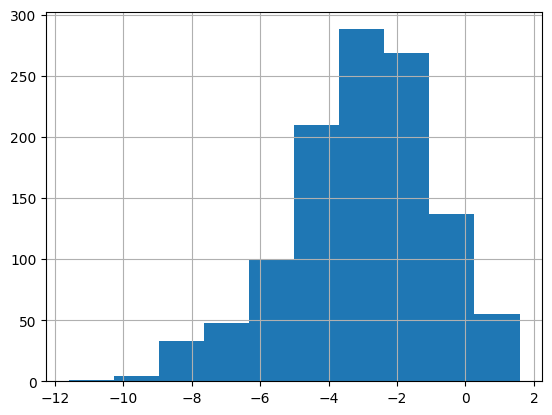

In [20]:
y.hist()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error(MSE): %.2f'
% mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
% r2_score(y_train, y_pred_train))

Coefficients: [-0.74456527 -0.00645863 -0.01112362 -0.42881812]
Intercept: 0.261396923207196
Mean squared error(MSE): 0.99
Coefficient of determination (R^2): 0.77


In [24]:
y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error(MSE): %.2f'
% mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
% r2_score(y_test, y_pred_test))

Coefficients: [-0.74456527 -0.00645863 -0.01112362 -0.42881812]
Intercept: 0.261396923207196
Mean squared error(MSE): 1.09
Coefficient of determination (R^2): 0.76


In [25]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]

print('logS = ' + ' ' + yintercept + ' ' + LogP + ' ' + MW + ' ' + RB + ' ' + AP)

logS =  0.26 -0.74 LogP -0.0065 MW -0.0111 RB -0.43 AP


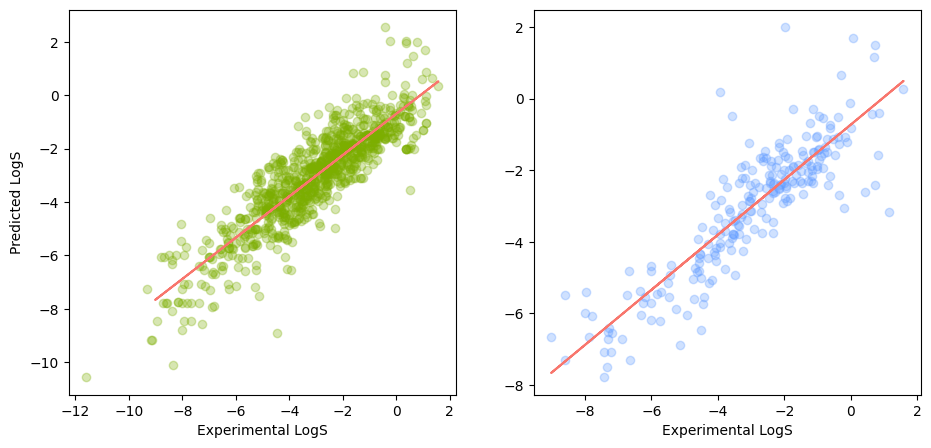

In [26]:
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=y_pred_train, c='#7CAE00', alpha=0.3)

z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), '#F8766D')

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.subplot(1, 2, 2)

plt.scatter(x=y_test, y=y_pred_test, c='#619CFF', alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), '#F8766D')

plt.xlabel('Experimental LogS')

plt.show()

In [27]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf

--2024-06-04 08:03:08--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf’

solubility.train.sd 100%[===================>]   1.31M  6.54MB/s    in 0.2s    

2024-06-04 08:03:10 (6.54 MB/s) - ‘solubility.train.sdf’ saved [1376487/1376487]

--2024-06-04 08:03:10--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 20

In [28]:
!ls

delaney.csv  sample_data  solubility.test.sdf  solubility.train.sdf


In [29]:
!head -n 40 solubility.train.sdf

n-pentane
     RDKit          2D

  5  4  0  0  0  0  0  0  0  0999 V2000
    0.2606    0.1503    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3000    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9000    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.9394    0.1503    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
M  END
>  <ID>  (1) 
1

>  <NAME>  (1) 
n-pentane

>  <SOL>  (1) 
-3.18

>  <SOL_classification>  (1) 
(A) low

>  <smiles>  (1) 
CCCCC

$$$$
cyclopentane
     RDKit          2D

  5  5  0  0  0  0  0  0  0  0999 V2000
    0.7500   -1.0323    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2135    0.3943    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.2760    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2135    0.3943    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.0323    0

In [30]:
train = [mol for mol in Chem.SDMolSupplier('solubility.train.sdf')]
test  = [mol for mol in Chem.SDMolSupplier('solubility.test.sdf')]

print('training: ', len(train))
print('test: ', len(test))

training:  1025
test:  257


In [31]:
train[0].GetPropsAsDict()['SOL']

-3.18

In [32]:
train[0].GetPropsAsDict()['smiles']

'CCCCC'

In [33]:
from rdkit.ML.Descriptors import MoleculeDescriptors

descs = [desc_name[0] for desc_name in Descriptors._descList]
descs

['MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',


In [34]:
len(descs)

210

In [35]:
desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator(descs)

In [36]:
X = [desc_calc.CalcDescriptors(mol) for mol in train]
y = [mol.GetPropsAsDict()['SOL'] for mol in train]

test_X = [desc_calc.CalcDescriptors(mol) for mol in test]
test_y = [mol.GetPropsAsDict()['SOL'] for mol in test]

In [37]:
len(X)

1025

In [38]:
X[0]

(2.2118055555555554,
 2.2118055555555554,
 1.34375,
 1.34375,
 0.4687855098011332,
 8.4,
 72.151,
 60.05499999999999,
 72.093900384,
 32,
 0,
 -0.05383131543183678,
 -0.06538255537938412,
 0.06538255537938412,
 0.05383131543183678,
 1.0,
 1.4,
 1.4,
 13.744962415414642,
 10.279705138833732,
 1.6770337181948811,
 -1.7882347992017722,
 1.878062415414647,
 -1.5871948611662696,
 4.236962415414642,
 0.7717051388337315,
 1.4056390622295665,
 2.19060968716425,
 7.5097750043269365,
 4.121320343559642,
 4.121320343559642,
 4.121320343559642,
 2.414213562373095,
 2.414213562373095,
 2.414213562373095,
 1.3535533905932735,
 1.3535533905932735,
 0.7071067811865474,
 0.7071067811865474,
 0.3535533905932737,
 0.3535533905932737,
 0.0,
 11.245112497836532,
 5.0,
 4.0,
 4.0,
 34.19901948541599,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33.10993926815928,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33.10993926815928,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [39]:
y[:5]

[-3.18, -2.64, -3.84, -3.74, -3.55]

In [40]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_y, test_y) =train_test_split(np.array(X), np.array(y), test_size=0.2)

In [41]:
!pip install lightgbm
import lightgbm as lgb

In [42]:
lgb_train = lgb.Dataset(train_X, label=train_y, free_raw_data = False)
lgb_test  = lgb.Dataset(test_X, label=test_y, free_raw_data = False)

In [43]:
params = {'num_leaves': 31,
          'min_data_in_leaf': 30,
          'objective': 'regression',
          'max_depth': -1,
          'learning_rate': 0.01,
          'min_child_samples': 20,
          'boosting': 'gbdt',
          'feature_fraction': 0.9,
          'bagging_freq': 1,
          'bagging_fraction': 0.9,
          'bagging_seed': 11,
          'metric': 'rmse',
          'lambda_l1': 0.1,
          'verbosity': -1,
          'nthread': 4,
          'random_state': 0}

In [44]:
print(train_X[0:20])
print(train_y[0:20])

import pandas as pd

reg = lgb.train(params,
                train_set = lgb_train,
                valid_sets = lgb_test,
                num_boost_round = 1000,
                feature_name='auto',
                categorical_feature='auto')

[[ 2.17824074  2.17824074  1.3112963  ...  0.          0.
   0.        ]
 [12.84483009 12.84483009  0.26476639 ...  0.          0.
   0.        ]
 [ 9.83158163  9.83158163  0.84541667 ...  0.          0.
   0.        ]
 ...
 [ 6.82415895  6.82415895  0.0466821  ...  0.          0.
   0.        ]
 [ 2.18865741  2.18865741  1.37787037 ...  1.          0.
   0.        ]
 [11.3811319  11.3811319   0.01564815 ...  0.          0.
   0.        ]]
[-5.26 -5.68 -2.22 -3.38 -2.96 -3.78  0.38 -4.89 -1.62 -2.33 -4.1  -7.82
 -0.43 -3.59 -0.71 -3.46 -4.12 -6.18 -4.38 -1.23]


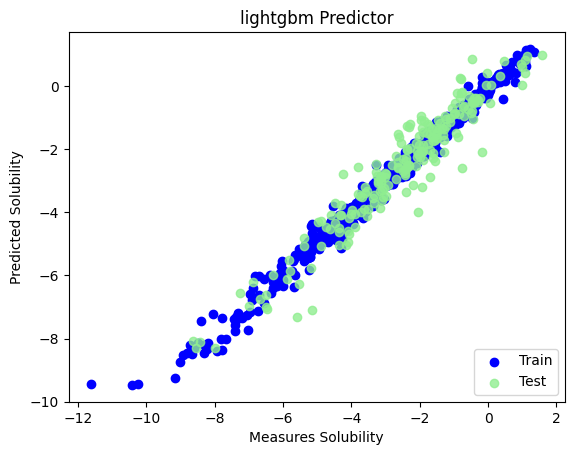

In [45]:
plt.figure()
plt.scatter(train_y, reg.predict(train_X, num_iteration = reg.best_iteration), label = 'Train', c ='blue')
plt.title('lightgbm Predictor')
plt.xlabel('Measures Solubility')
plt.ylabel('Predicted Solubility')
plt.scatter(test_y, reg.predict(test_X, num_iteration = reg.best_iteration), c = 'lightgreen', label = 'Test', alpha = 0.8)
plt.legend(loc = 4)
plt.show()

In [52]:
!pip3 install dgl dgllife

In [53]:
X = [mol.GetPropsAsDict()['smiles'] for mol in train]
y = [mol.GetPropsAsDict()['SOL_classification'] for mol in train]

df = pd.DataFrame({'SMILES': X, 'classification': y})
df

,SMILES,classification
0,CCCCC,(A) low
1,C1CCCC1,(B) medium
2,CCCCCC,(A) low
3,CCCC(C)C,(A) low
4,CCC(C)(C)C,(A) low
...,...,...
1020,O=C1C=C2CCC3C4CCC(O)(C(=O)COC(=O)C(C)(C)C)C4(C...,(A) low
1021,O=C(NCC(=O)O)CCC(C(C(C(C(C(C(C(C1)CC(O)C2)(C2)...,(A) low
1022,c12C(=O)C3=C(O)C4(O)C(=O)C=C(O)C(N(C)C)C4CC3C(...,(B) medium
1023,C1C(=O)C=C2CCC3C4CCC(O)(C(=O)COC(=O)CC(C)(C)C)...,(A) low


In [54]:
set(df['classification'])

{'(A) low', '(B) medium', '(C) high'}

In [55]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.nn import CrossEntropyLoss

In [56]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("2.3")

Looking in indexes: https://download.pytorch.org/whl/cu121
2.3.0+cu121 True


In [58]:
import dgl
from dgl.data import DGLDataset

ImportError: cannot import name 'DILL_AVAILABLE' from 'torch.utils.data.datapipes.utils.common' (/usr/local/lib/python3.10/dist-packages/torch/utils/data/datapipes/utils/common.py)

In [82]:
from dgllife.utils import mol_to_graph
from dgllife.utils import mol_to_complete_graph
from dgllife.utils.featurizers import CanonicalAtomFeaturizer
from dgllife.utils.featurizers import CanonicalBondFeaturizer

ImportError: cannot import name 'DILL_AVAILABLE' from 'torch.utils.data.datapipes.utils.common' (/usr/local/lib/python3.10/dist-packages/torch/utils/data/datapipes/utils/common.py)